In [3]:
import pandas as pd
import numpy as np

#### Eksik Veriler

Veri biliminde her zaman tam verilerle çalışmayabiliriz. Bu veriler eksik verilerde olabilir Neyden bahsediyorum hemen anlatalım:

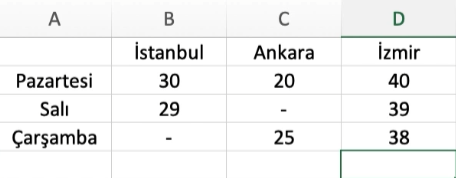

Görüldüğü gibi burada verilerden bazıları eksik işte bu tip veriler oldukça sık bir şekilde karşılaşabiliriz. Bu verilerle nasıl mücadele edebiliriz. Gelin bu notebookta onu ele alalım

In [3]:
sozlukVerisi = {"İstanbul" : [30,29,np.nan], "Ankara" : [20,np.nan,25], "İzmir" : [40,39,38]} #np.nan dediğim şey boşluk verilerini söyler..
havaDurumuDataFrame = pd.DataFrame(sozlukVerisi, index = ["Pazartesi","Salı","Çarşamba"])

In [5]:
havaDurumuDataFrame # NaN olanlar eksik verilerdir

,İstanbul,Ankara,İzmir
Pazartesi,30.0,20.0,40
Salı,29.0,NaN,39
Çarşamba,NaN,25.0,38


> Bu tip eksik verilerden kurtulmanın bir çözüm yolu direkt eksik olan verileri silmektir. 

In [6]:
havaDurumuDataFrame.dropna() 

,İstanbul,Ankara,İzmir
Pazartesi,30.0,20.0,40


> dropna() --> drop null avaible demektir yani eksik olan verilerin satırını komple bizim için düşürür yani bunları veri seti içerisinde ayıklayıp kaldırıyor.

In [7]:
havaDurumuDataFrame 

,İstanbul,Ankara,İzmir
Pazartesi,30.0,20.0,40
Salı,29.0,NaN,39
Çarşamba,NaN,25.0,38


> dropna() kullanılmasına rağmen eksik verilerde gelmeye devam etti yani burada işlem yapılırsa bu işlem gerçek dataframe'i etkilemez.

* Bunun için yapılması gereken yeni bir değişken oluşturup eksik verilerden arındırılmış bir yeni dataframe döndürmektir. Yani kısaca dropna() yeni bir dataframe döndürür....

* Peki dropna() sadece satırı mı siler kolonu silemez miyiz sorusu akla gelirse burada ise axis belirtirsek direkt kolonu siler...

In [8]:
havaDurumuDataFrame.dropna(axis = 1) # axis = 0'sa satırı, axis = 1'se sütunu siler

,İzmir
Pazartesi,40
Salı,39
Çarşamba,38


> peki tek bir nan olduğu için komple satırı veya sütunu siliyoruz bu biraz saçma değil mi atıyorum bir tane nan varsa kalsın eğer 10 tane nan varsa silsin gibi bir mantıkla yol alırsak bu şekilde yapı kuramaz mıyız diye düşünebiliriz.

Tabiki olabilir. Yeni bir dataframe üzerinde anlatalım....

In [9]:
yeniVeri = {"İstanbul" : [30,29,np.nan], "Ankara" : [20,np.nan,25], "İzmir" : [40,39,38], "Antalya" : [45,np.nan,np.nan]}
yeniDataFrame = pd.DataFrame(yeniVeri, index = ["Pazartesi", "Salı","Çarşamba"])

In [11]:
yeniDataFrame # görüldüğü gibi dataframe gözüktü

,İstanbul,Ankara,İzmir,Antalya
Pazartesi,30.0,20.0,40,45.0
Salı,29.0,NaN,39,NaN
Çarşamba,NaN,25.0,38,NaN


> Threshold --> girilen sayının üzerinde nan değeri varsa onları siler

In [13]:
yeniDataFrame.dropna(axis = 1, thresh=2) # axis 1 olduğuna göre sütunda 2 ve üzeri nan değerleri bulunan sütunları kaldır gitsin

,İstanbul,Ankara,İzmir
Pazartesi,30.0,20.0,40
Salı,29.0,NaN,39
Çarşamba,NaN,25.0,38


> Eksik Verileri illa silmemiz mi gerekir Onun yerine başka değerler koyabilir miyiz?

* Evet koyabiliriz istersen kendi girdiğin değeri, istersen standart sapmayı, istersen medyanı, istersen aritmetik ortalamayı gibi değerlerin hepsini girmen mümkündür...

``
bunun için fillna() methodunu kullanırsın
``

In [15]:
yeniDataFrame.fillna(10) # eksik değerlerin içerisine 10 sayısını yazdırdı

,İstanbul,Ankara,İzmir,Antalya
Pazartesi,30.0,20.0,40,45.0
Salı,29.0,10.0,39,10.0
Çarşamba,10.0,25.0,38,10.0


In [19]:
yeniDataFrame.fillna(yeniDataFrame.median()) # yeniDataFrame içerisindeki eksik değerlere median atadık...

,İstanbul,Ankara,İzmir,Antalya
Pazartesi,30.0,20.0,40,45.0
Salı,29.0,22.5,39,45.0
Çarşamba,29.5,25.0,38,45.0


In [21]:
yeniDataFrame.fillna(yeniDataFrame.std()) # standart sapma koyar ama antalyada olmadı tek neden diye soracak olursak ?

,İstanbul,Ankara,İzmir,Antalya
Pazartesi,30.000000,20.000000,40,45.0
Salı,29.000000,3.535534,39,NaN
Çarşamba,0.707107,25.000000,38,NaN


> Antalyanın NaN olarak kalmasının sebebi standart sapma kuralından yani istatistikten gelir tek bir veri üzerinden standart sapma alınamaz!!!

#### group by

> groupby ---> bazı verileri kendi içerisinde gruplamamıza olanak sağlayan bir yapıdır.

* Örneğin aşağıda bir şirketin departmanları, çalışan isimleri ve maaş bilgileri verilmiştir. 
* Bu bilgileri kendi içerisinde gruplayarak gerekli istatistiksel bilgileri alabiliriz...

In [33]:
maasSozlugu = {"Departmanlar" : ["Yazılım", "Yazılım", "Pazarlama", "Pazarlama", "İnsan Kaynakları", "İnsan Kaynakları"],
              "Çalışanların İsmi" : ["Ahmet","Mehmet","Hasan","Zeynep","Burak","Melis"],
               "Maaş" : [100,200,300,500,600,900]
              } # veri girişini sağladık

In [34]:
maasDataFrame = pd.DataFrame(maasSozlugu) # bir dataFrame çerçevesine bu verileri aktardık...

In [15]:
maasDataFrame

,Departmanlar,Çalışanların İsmi,Maaş
0,Yazılım,Ahmet,100
1,Yazılım,Mehmet,200
2,Pazarlama,Hasan,300
3,Pazarlama,Zeynep,500
4,İnsan Kaynakları,Burak,600
5,İnsan Kaynakları,Melis,900


> Yukarıdaki veri setini departmanlara göre grupladık...

In [22]:
maasDataFrame.groupby("Departmanlar") # çalıştı ama değişkene atılması gerekir..

In [23]:
groupDepartman = maasDataFrame.groupby("Departmanlar")

In [24]:
groupDepartman.count() # toplam çalışan sayısını bana verir...

,Çalışanların İsmi,Maaş
Departmanlar,,
Pazarlama,2,2
Yazılım,2,2
İnsan Kaynakları,2,2


In [35]:
groupDepartman.mean("Maaş") # bölümlere göre maaş ortalamasını verir

,Maaş
Departmanlar,
Pazarlama,400.0
Yazılım,150.0
İnsan Kaynakları,750.0


In [36]:
groupDepartman.min() # bölümlerin min değerlerini verir

,Çalışanların İsmi,Maaş
Departmanlar,,
Pazarlama,Hasan,300
Yazılım,Ahmet,100
İnsan Kaynakları,Burak,600


In [37]:
groupDepartman.max() # bölümlerin maksimum değerini verir...

,Çalışanların İsmi,Maaş
Departmanlar,,
Pazarlama,Zeynep,500
Yazılım,Mehmet,200
İnsan Kaynakları,Melis,900


In [38]:
groupDepartman.describe() # istatistiksel bilgilerin tamamını bize verir

Maaş                                                      
                 count   mean         std    min    25%    50%    75%    max
Departmanlar                                                                
Pazarlama          2.0  400.0  141.421356  300.0  350.0  400.0  450.0  500.0
Yazılım            2.0  150.0   70.710678  100.0  125.0  150.0  175.0  200.0
İnsan Kaynakları   2.0  750.0  212.132034  600.0  675.0  750.0  825.0  900.0